### Anomaly detection - Summary (1/2)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
signals_test2_channels = sio.loadmat('./DataSignals/signals_test2_channels.mat')
signals_test2_channels

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Thu May  6 09:33:29 2021',
 '__version__': '1.0',
 '__globals__': [],
 'Ch1': array([[-0.049, -0.042,  0.015, ..., -0.002, -0.002, -0.002]]),
 'Ch2': array([[-0.071, -0.073,  0.   , ...,  0.   , -0.002,  0.   ]]),
 'Ch3': array([[-0.132, -0.007,  0.007, ...,  0.   ,  0.   ,  0.   ]]),
 'Ch4': array([[-0.01 , -0.105,  0.   , ..., -0.002, -0.002, -0.002]])}

In [3]:
Ch1_test2 = signals_test2_channels['Ch1']
Ch1_test2 = Ch1_test2[0]

In [9]:
signal_duration_test2 = 9840
nfiles_test2 = 984
onset_anomalies_PCA_GMM_Ch1 = (signal_duration_test2 - 2820)
onset_anomalies_PCA_ZS_Ch1 = (signal_duration_test2 - 3720)
onset_anomalies_Autoencoder_GMM_Ch1 = (signal_duration_test2 - 2820)
onset_anomalies_Autoencoder_ZS_Ch1 = (signal_duration_test2 - 2810)
onset_anomalies_OCSVM = (signal_duration_test2 - 3760)

In [10]:
t_test2 =  np.linspace(0, signal_duration_test2, len(Ch1_test2))

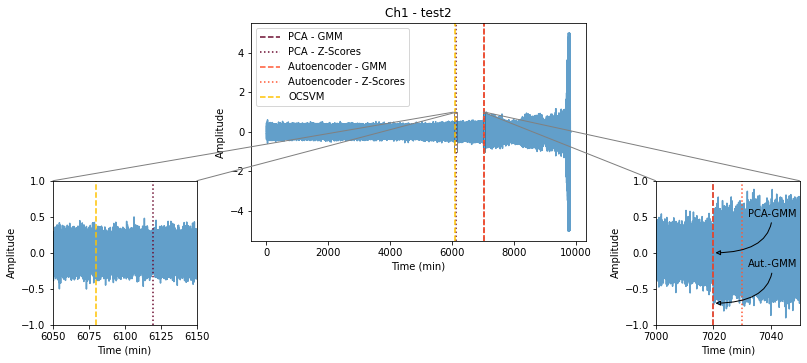

In [23]:
fig, ax = plt.subplots()
axins = inset_axes(ax, 2, 2 , loc=1, bbox_to_anchor=(0.01, 0.35), bbox_transform=ax.figure.transFigure)
axins2 = inset_axes(ax, 2, 2 , loc=2, bbox_to_anchor=(1.05, 0.35), bbox_transform=ax.figure.transFigure)

ax.plot(t_test2, Ch1_test2, alpha = 0.7)
ax.axvline(onset_anomalies_PCA_GMM_Ch1, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
ax.axvline(onset_anomalies_PCA_ZS_Ch1, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
ax.axvline(onset_anomalies_Autoencoder_GMM_Ch1, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
ax.axvline(onset_anomalies_Autoencoder_ZS_Ch1, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
ax.axvline(onset_anomalies_OCSVM, color = '#FFC300', linestyle='--', label = 'OCSVM')

axins.plot(t_test2, Ch1_test2,  alpha = 0.7)
axins.axvline(onset_anomalies_PCA_GMM_Ch1, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
axins.axvline(onset_anomalies_PCA_ZS_Ch1, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
axins.axvline(onset_anomalies_Autoencoder_GMM_Ch1, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
axins.axvline(onset_anomalies_Autoencoder_ZS_Ch1, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
axins.axvline(onset_anomalies_OCSVM, color = '#FFC300', linestyle='--', label = 'OCSVM')

axins2.plot(t_test2, Ch1_test2,  alpha = 0.7)
axins2.axvline(onset_anomalies_PCA_GMM_Ch1, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
axins2.axvline(onset_anomalies_PCA_ZS_Ch1, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
axins2.axvline(onset_anomalies_Autoencoder_GMM_Ch1, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
axins2.axvline(onset_anomalies_Autoencoder_ZS_Ch1, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
axins2.axvline(onset_anomalies_OCSVM, color = '#FFC300', linestyle='--', label = 'OCSVM')

x1, x2, y1, y2 = 6050, 6150, -1, 1 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

x1, x2, y1, y2 = 7000, 7050, -1, 1 # specify the limits
axins2.set_xlim(x1, x2) # apply the x-limits
axins2.set_ylim(y1, y2) # apply the y-limits
axins2.annotate('PCA-GMM', xy=(7020, 0), xytext=(7032, 0.5),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )
axins2.annotate('Aut.-GMM', xy=(7020, -0.7), xytext=(7032, -0.2),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
mark_inset(ax, axins2, loc1=1, loc2=2, fc="none", ec="0.5")

ax.set_xlabel('Time (min)')
ax.set_ylabel('Amplitude')
ax.set_title('Ch1 - test2')

axins.set_xlabel('Time (min)')
axins.set_ylabel('Amplitude')

axins2.set_xlabel('Time (min)')
axins2.set_ylabel('Amplitude')

ax.legend()

In [7]:
signals_test1_channels = sio.loadmat('./DataSignals/signals_test1_channels.mat')
Ch5_test1 = signals_test1_channels['Ch5']
Ch6_test1 = signals_test1_channels['Ch6']
Ch5_test1 = Ch5_test1[0]
Ch6_test1 = Ch6_test1[0]

In [8]:
signal_duration_test1 = 43 * 5 + (2156 - 43) * 10
nfiles_test1 = 2156
onset_anomalies_PCA_GMM_Ch5 = (signal_duration_test1 - 3320)
onset_anomalies_PCA_ZS_Ch5 = (signal_duration_test1 - 3320)
onset_anomalies_Autoencoder_GMM_Ch5 = (signal_duration_test1 - 3350)
onset_anomalies_Autoencoder_ZS_Ch5 = (signal_duration_test1 - 3350)
onset_anomalies_OCSVM_Ch5 = (signal_duration_test1 - 3350) 

onset_anomalies_PCA_GMM_Ch6 = (signal_duration_test1 - 2820) 
onset_anomalies_PCA_ZS_Ch6 = (signal_duration_test1 - 3720)
onset_anomalies_Autoencoder_GMM_Ch6 = (signal_duration_test1 - 3310)
onset_anomalies_Autoencoder_ZS_Ch6 = (signal_duration_test1 - 3310)
onset_anomalies_OCSVM_Ch6 = (signal_duration_test1 - 4350)

In [9]:
t_test1 =  np.linspace(0, signal_duration_test1, len(Ch5_test1))

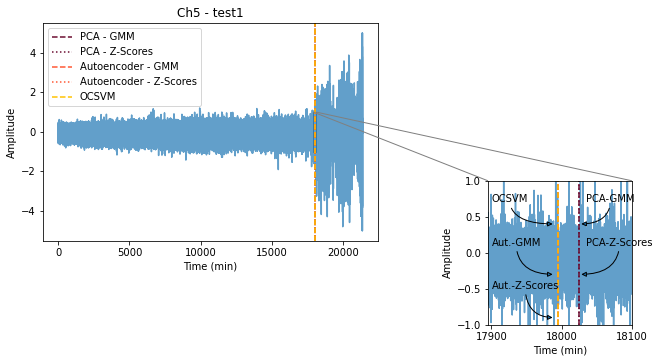

In [10]:
fig, ax = plt.subplots()
axins = inset_axes(ax, 2, 2 , loc=1, bbox_to_anchor=(1.5, 0.35), bbox_transform=ax.figure.transFigure)

ax.plot(t_test1, Ch5_test1, alpha = 0.7)
ax.axvline(onset_anomalies_PCA_GMM_Ch5, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
ax.axvline(onset_anomalies_PCA_ZS_Ch5, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
ax.axvline(onset_anomalies_Autoencoder_GMM_Ch5, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
ax.axvline(onset_anomalies_Autoencoder_ZS_Ch5, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
ax.axvline(onset_anomalies_OCSVM_Ch5, color = '#FFC300', linestyle='--', label = 'OCSVM')

axins.plot(t_test1, Ch5_test1, alpha = 0.7)
axins.axvline(onset_anomalies_PCA_GMM_Ch5, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
axins.axvline(onset_anomalies_PCA_ZS_Ch5, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
axins.axvline(onset_anomalies_Autoencoder_GMM_Ch5, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
axins.axvline(onset_anomalies_Autoencoder_ZS_Ch5, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
axins.axvline(onset_anomalies_OCSVM_Ch5, color = '#FFC300', linestyle='--', label = 'OCSVM')

x1, x2, y1, y2 = 17895, 18100, -1, 1 # specify the limits
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
axins.annotate('OCSVM', xy=(17990, 0.4), xytext=(17900, 0.7),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )      
axins.annotate('Aut.-GMM', xy=(17990, -0.3), xytext=(17900, 0.1),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )
axins.annotate('Aut.-Z-Scores', xy=(17990, -0.9), xytext=(17900,-0.5),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )

axins.annotate('PCA-GMM', xy=(18025, 0.4), xytext=(18035, 0.7),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )      
axins.annotate('PCA-Z-Scores', xy=(18025, -0.3), xytext=(18035, 0.1),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )

ax.set_xlabel('Time (min)')
ax.set_ylabel('Amplitude')
ax.set_title('Ch5 - test1')
#ax.axes.xaxis.set_ticks([])

axins.set_xlabel('Time (min)')
axins.set_ylabel('Amplitude')
#axins.axes.xaxis.set_ticks([])

ax.legend()

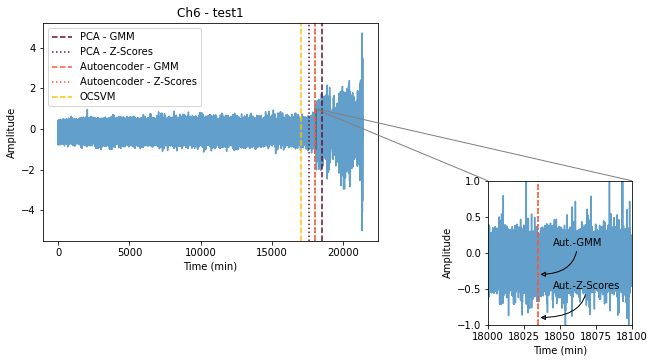

In [11]:
fig, ax = plt.subplots()
axins = inset_axes(ax, 2, 2 , loc=1, bbox_to_anchor=(1.5, 0.35), bbox_transform=ax.figure.transFigure)

ax.plot(t_test1, Ch6_test1, alpha = 0.7)
ax.axvline(onset_anomalies_PCA_GMM_Ch6, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
ax.axvline(onset_anomalies_PCA_ZS_Ch6, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
ax.axvline(onset_anomalies_Autoencoder_GMM_Ch6, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
ax.axvline(onset_anomalies_Autoencoder_ZS_Ch6, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
ax.axvline(onset_anomalies_OCSVM_Ch6, color = '#FFC300', linestyle='--', label = 'OCSVM')

axins.plot(t_test1, Ch6_test1, alpha = 0.7)
axins.axvline(onset_anomalies_PCA_GMM_Ch6, color = '#6A0A2F', linestyle='--', label = 'PCA - GMM')
axins.axvline(onset_anomalies_PCA_ZS_Ch6, color = '#6A0A2F', linestyle=':', label = 'PCA - Z-Scores')
axins.axvline(onset_anomalies_Autoencoder_GMM_Ch6, color = '#FF5733', linestyle='--', label = 'Autoencoder - GMM')
axins.axvline(onset_anomalies_Autoencoder_ZS_Ch6, color = '#FF5733', linestyle=':', label = 'Autoencoder - Z-Scores')
axins.axvline(onset_anomalies_OCSVM_Ch6, color = '#FFC300', linestyle='--', label = 'OCSVM')

x1, x2, y1, y2 = 18000, 18100, -1, 1 
axins.set_xlim(x1, x2) 
axins.set_ylim(y1, y2) 

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")     
axins.annotate('Aut.-GMM', xy=(18035, -0.3), xytext=(18045, 0.1),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )
axins.annotate('Aut.-Z-Scores', xy=(18035, -0.9), xytext=(18045,-0.5),
            arrowprops=dict(arrowstyle="-|>", connectionstyle="angle3,angleA=90,angleB=0")
            )

ax.set_xlabel('Time (min)')
ax.set_ylabel('Amplitude')
ax.set_title('Ch6 - test1')

axins.set_xlabel('Time (min)')
axins.set_ylabel('Amplitude')

ax.legend()